# SkAI - AlexNet and ResNet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Prepare Train and Test Images

In [1]:
from prepare_images import prepare_images
prepare_images()

## Prepare DataLoaders

In [1]:
from prepare_data_loaders import prepare_data_loaders
dataloaders, class_to_idx = prepare_data_loaders()

## AlexNet Model

In [2]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import ALEXNET_EPOCHS

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = initialize_model('alexnet', device, True, True)

params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
# Set optimizer
optimizer = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
trained_model_an, train_loss_history_an, val_loss_history_an, train_acc_history_an, val_acc_history_an = train_model(model, device, dataloaders, criterion, optimizer, ALEXNET_EPOCHS)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 classifier.fc1.weight
	 classifier.fc1.bias
	 classifier.fc2.weight
	 classifier.fc2.bias
Epoch 0/30
----------
train Loss: 1.1210 Acc: 0.4160
val Loss: 0.9530 Acc: 0.5498

Epoch 1/30
----------
train Loss: 0.9229 Acc: 0.5816
val Loss: 0.8146 Acc: 0.6220

Epoch 2/30
----------
train Loss: 0.7700 Acc: 0.6624
val Loss: 0.7069 Acc: 0.6907

Epoch 3/30
----------
train Loss: 0.6732 Acc: 0.7152
val Loss: 0.6545 Acc: 0.6976

Epoch 4/30
----------
train Loss: 0.6223 Acc: 0.7360
val Loss: 0.6136 Acc: 0.7388

Epoch 5/30
----------
train Loss: 0.5855 Acc: 0.7600
val Loss: 0.5820 Acc: 0.7285

Epoch 6/30
----------
train Loss: 0.5387 Acc: 0.7792
val Loss: 0.5390 Acc: 0.7766

Epoch 7/30
----------
train Loss: 0.5138 Acc: 0.7944
val Loss: 0.5165 Acc: 0.7732

Epoch 8/30
----------
train Loss: 0.4950 Acc: 0.8096
val Loss: 0.4926 Acc: 0.7835

Epoch 9/30
----------
train Loss: 0.4650 Acc: 0.8248
val Loss: 0.4720 Acc: 0.8041

Epoch 10/30
----------
train Loss: 0.4574 Acc: 0.8240
val Los

## ResNet Model

In [3]:
from initialize_model import initialize_model
from train_model import train_model
import torch
from torch import nn
from torch import optim
from config import RESNET_EPOCHS

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = initialize_model('resnet', device, True, True)

params_to_update = model.parameters()
print("Params to learn:")
feature_extract = True
if feature_extract:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Setup the loss fxn
criterion = nn.CrossEntropyLoss()
# Set optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
model.to(device)
trained_model_rn, train_loss_history_rn, val_loss_history_rn, train_acc_history_rn, val_acc_history_rn = train_model(model, device, dataloaders, criterion, optimizer, RESNET_EPOCHS)

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Params to learn:
	 fc.0.weight
	 fc.0.bias
	 fc.2.weight
	 fc.2.bias
Epoch 0/40
----------
train Loss: 1.0847 Acc: 0.3880
val Loss: 1.0767 Acc: 0.4192

Epoch 1/40
----------
train Loss: 1.0520 Acc: 0.4360
val Loss: 1.0355 Acc: 0.4227

Epoch 2/40
----------
train Loss: 1.0146 Acc: 0.5568
val Loss: 0.9863 Acc: 0.5017

Epoch 3/40
----------
train Loss: 0.9709 Acc: 0.5192
val Loss: 0.9364 Acc: 0.5326

Epoch 4/40
----------
train Loss: 0.9114 Acc: 0.6544
val Loss: 0.8633 Acc: 0.6323

Epoch 5/40
----------
train Loss: 0.8467 Acc: 0.6728
val Loss: 0.7988 Acc: 0.6804

Epoch 6/40
----------
train Loss: 0.7864 Acc: 0.7152
val Loss: 0.7433 Acc: 0.6770

Epoch 7/40
----------
train Loss: 0.7469 Acc: 0.7048
val Loss: 0.7359 Acc: 0.6564

Epoch 8/40
----------
train Loss: 0.6986 Acc: 0.7176
val Loss: 0.6839 Acc: 0.7045

Epoch 9/40
----------
train Loss: 0.6485 Acc: 0.7536
val Loss: 0.6121 Acc: 0.7526

Epoch 10/40
----------
train Loss: 0.6163 Acc: 0.7616
val Loss: 0.5939 Acc: 0.7698

Epoch 11/40
-----

## Model Performance Analysis

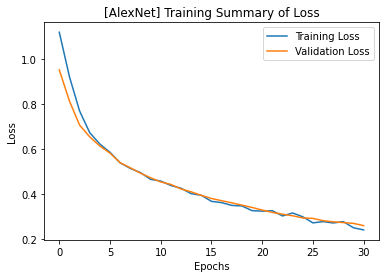

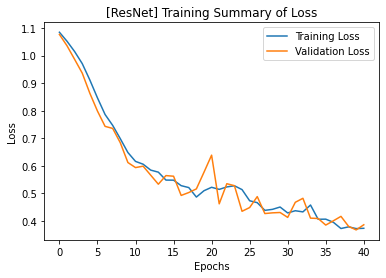

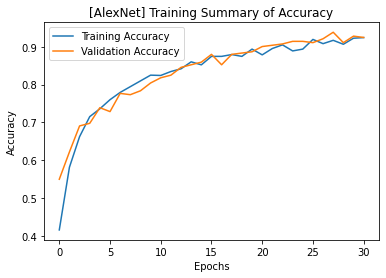

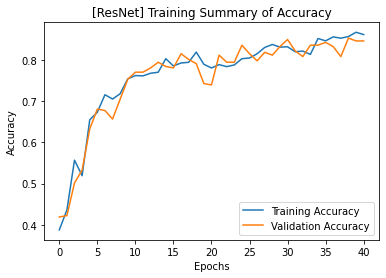

In [4]:
from model_perf_analysis import model_perf_analysis

model_perf_analysis(train_loss_history_an, val_loss_history_an, 'Loss', '[AlexNet]')
model_perf_analysis(train_loss_history_rn, val_loss_history_rn, 'Loss', '[ResNet]')

model_perf_analysis([float(x) for x in train_acc_history_an], [float(x) for x in val_acc_history_an], 'Accuracy', '[AlexNet]')
model_perf_analysis([float(x) for x in train_acc_history_rn], [float(x) for x in val_acc_history_rn], 'Accuracy', '[ResNet]')

## Save Models

In [5]:
from config import ROOT_MODELS_FOLDER, ALEXNET_MODEL_NAME, RESNET_MODEL_NAME

torch.save(trained_model_an.state_dict(), ROOT_MODELS_FOLDER + '/' + ALEXNET_MODEL_NAME)
torch.save(trained_model_rn.state_dict(), ROOT_MODELS_FOLDER + '/' +RESNET_MODEL_NAME)

## Test Accuracy Analysis

[AlexNet] Test Accuracy: 0.8084613382816315


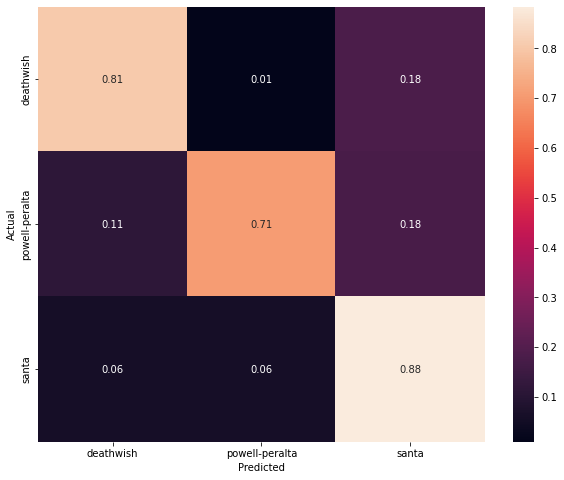

[ResNet] Test Accuracy: 0.7908832132816315


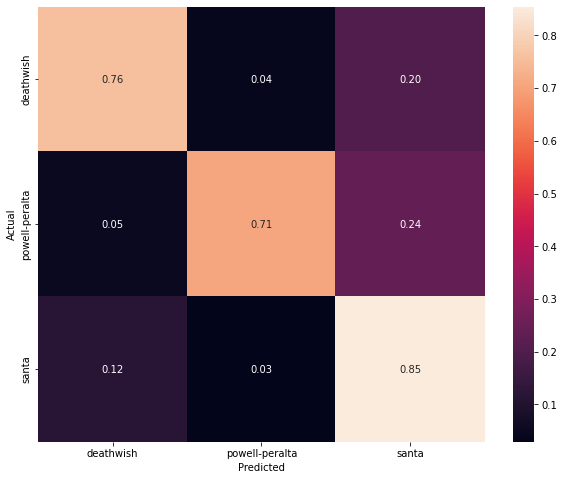

In [6]:
from test_accuracy import test_accuracy

test_accuracy(trained_model_an, dataloaders, device, '[AlexNet]', list(class_to_idx.keys()))
test_accuracy(trained_model_rn, dataloaders, device, '[ResNet]', list(class_to_idx.keys()))

## Predict Deck Images

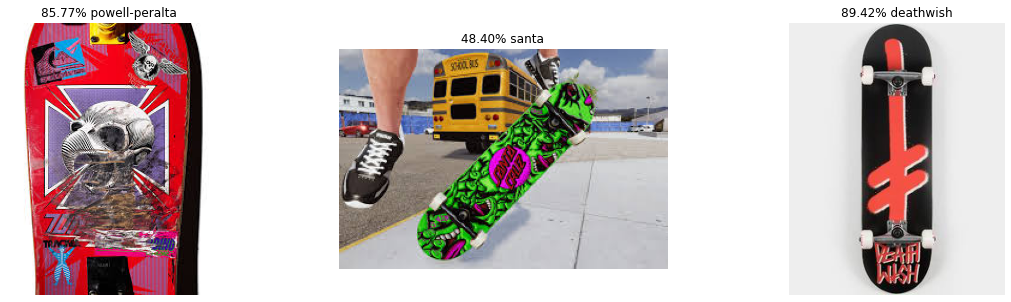

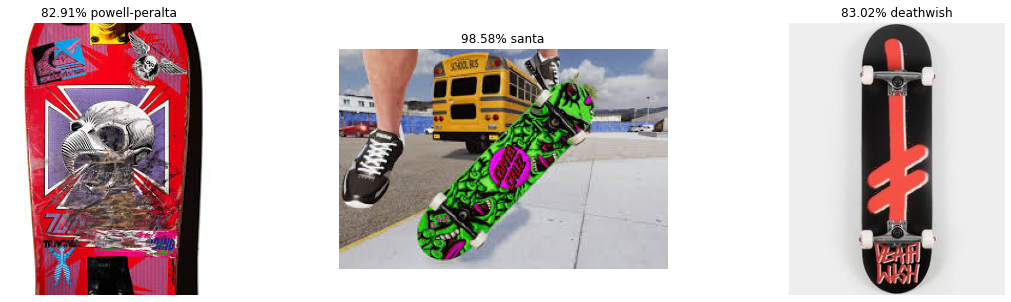

In [8]:
import torch
from initialize_model import initialize_model
from predict_deck_brands import predict_deck_brands
from config import ROOT_MODELS_FOLDER, ALEXNET_MODEL_NAME, RESNET_MODEL_NAME

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trained_model_an = initialize_model('alexnet', device, True, True)
trained_model_an.load_state_dict(torch.load(ROOT_MODELS_FOLDER + '/' + ALEXNET_MODEL_NAME, map_location=torch.device('cpu')))
predict_deck_brands(trained_model_an, device, {'deathwish': 0, 'powell-peralta': 1, 'santa': 2})

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
trained_model_rn = initialize_model('resnet', device, True, True)
trained_model_rn.load_state_dict(torch.load(ROOT_MODELS_FOLDER + '/' +RESNET_MODEL_NAME, map_location=torch.device('cpu')))
predict_deck_brands(trained_model_rn, device, {'deathwish': 0, 'powell-peralta': 1, 'santa': 2})